In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'activity'
DISCOVERY_TIMEOUT_SECONDS=1800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/fitbit/data.csv')
df

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,sd_norm_heart,steps_times_distance,device,activity
0,20.0,1.0,168.0,65.4,10.7714,78.5313,0.3445,0.0083,6.2216,6.1163,59.0,1.0000,19.5313,1.0000,0.0897,0.0,0.0
1,20.0,1.0,168.0,65.4,11.4753,78.4534,3.2876,0.0089,6.2216,6.1163,59.0,1.0000,19.4534,1.0000,0.1021,0.0,0.0
2,20.0,1.0,168.0,65.4,12.1792,78.5408,9.4840,0.0095,6.2216,6.1163,59.0,1.0000,19.5408,1.0000,0.1153,0.0,0.0
3,20.0,1.0,168.0,65.4,12.8831,78.6283,10.1546,0.0100,6.2216,6.1163,59.0,1.0000,19.6283,1.0000,0.1293,0.0,0.0
4,20.0,1.0,168.0,65.4,13.5870,78.7157,10.8251,0.0106,6.2216,6.1163,59.0,0.9828,19.7157,0.2416,0.1441,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,46.0,0.0,157.5,71.4,1.0000,35.0000,20.5000,1.0000,0.0000,0.0000,35.0,1.0000,0.0000,0.0000,1.0000,1.0,3.0
6260,46.0,0.0,157.5,71.4,1.0000,35.0000,20.5000,1.0000,0.0000,0.0000,35.0,1.0000,0.0000,1.0000,1.0000,1.0,3.0
6261,46.0,0.0,157.5,71.4,1.0000,35.0000,20.5000,1.0000,0.0000,0.0000,35.0,1.0000,0.0000,1.0000,1.0000,1.0,3.0
6262,46.0,0.0,157.5,71.4,1.0000,35.0000,20.5000,1.0000,0.0000,0.0000,35.0,1.0000,0.0000,1.0000,1.0000,1.0,3.0


In [3]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6264 non-null   float64
 1   gender                6264 non-null   float64
 2   height                6264 non-null   float64
 3   weight                6264 non-null   float64
 4   steps                 6264 non-null   float64
 5   heart_rate            6264 non-null   float64
 6   calories              6264 non-null   float64
 7   distance              6264 non-null   float64
 8   entropy_heart         6264 non-null   float64
 9   entropy_steps         6264 non-null   float64
 10  resting_heart         6264 non-null   float64
 11  corr_heart_steps      6264 non-null   float64
 12  norm_heart            6264 non-null   float64
 13  sd_norm_heart         6264 non-null   float64
 14  steps_times_distance  6264 non-null   float64
 15  device               

None

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,sd_norm_heart,steps_times_distance,device,activity
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,29.158525,0.476533,169.709052,69.614464,109.562267,86.142331,19.471823,13.832554,6.030314,5.739981,65.869932,0.306447,20.272392,8.110854,590.035240,0.416347,2.315134
std,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388115,12.535080,4063.838530,0.492992,1.736421
min,18.000000,0.000000,143.000000,43.000000,1.000000,2.222200,0.056300,0.000400,0.000000,0.000000,3.000000,-1.000000,-76.000000,0.000000,0.000700,0.000000,0.000000
25%,23.000000,0.000000,160.000000,60.000000,5.159575,75.598100,0.735875,0.019100,6.108500,5.909400,58.134300,-0.467325,1.148900,0.264700,0.659275,0.000000,1.000000
50%,28.000000,0.000000,168.000000,68.000000,10.092050,77.267700,4.000000,0.181750,6.189800,6.157200,75.000000,0.665800,9.820250,2.893500,13.368600,0.000000,2.000000
75%,33.000000,1.000000,180.000000,77.300000,105.847200,95.669150,20.500000,15.697200,6.247900,6.247900,76.138700,1.000000,27.077325,9.679675,93.728600,1.000000,4.000000
max,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333300,97.500000,335.000000,6.475700,6.475700,155.000000,1.000000,156.319400,74.457900,51520.000000,1.000000,5.000000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/fitbit/knowledge.txt')
knowledge

Knowledge(required_edges=[], forbidden_edges=[('entropy_heart', 'weight'), ('heart_rate', 'gender'), ('entropy_steps', 'gender'), ('corr_heart_steps', 'weight'), ('distance', 'age'), ('resting_heart', 'activity'), ('sd_norm_heart', 'height'), ('sd_norm_heart', 'age'), ('distance', 'height'), ('calories', 'gender'), ('heart_rate', 'activity'), ('entropy_steps', 'activity'), ('norm_heart', 'height'), ('distance', 'device'), ('norm_heart', 'age'), ('steps_times_distance', 'gender'), ('sd_norm_heart', 'device'), ('resting_heart', 'weight'), ('calories', 'activity'), ('steps', 'gender'), ('heart_rate', 'weight'), ('norm_heart', 'device'), ('entropy_steps', 'weight'), ('steps_times_distance', 'activity'), ('corr_heart_steps', 'age'), ('entropy_heart', 'height'), ('steps', 'activity'), ('entropy_heart', 'age'), ('calories', 'weight'), ('corr_heart_steps', 'height'), ('entropy_heart', 'device'), ('steps_times_distance', 'weight'), ('sd_norm_heart', 'gender'), ('corr_heart_steps', 'device'), ('

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(TARGET, axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=       age  gender  height  weight    steps  heart_rate  calories  distance  \
0     20.0     1.0   168.0    65.4  10.7714     78.5313    0.3445    0.0083   
1     20.0     1.0   168.0    65.4  11.4753     78.4534    3.2876    0.0089   
2     20.0     1.0   168.0    65.4  12.1792     78.5408    9.4840    0.0095   
3     20.0     1.0   168.0    65.4  12.8831     78.6283   10.1546    0.0100   
4     20.0     1.0   168.0    65.4  13.5870     78.7157   10.8251    0.0106   
...    ...     ...     ...     ...      ...         ...       ...       ...   
6259  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6260  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6261  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6262  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6263  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   

      entropy_heart  entropy_steps  re

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Apple Fitbit', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=       age  gender  height  weight    steps  heart_rate  calories  distance  \
0     20.0     1.0   168.0    65.4  10.7714     78.5313    0.3445    0.0083   
1     20.0     1.0   168.0    65.4  11.4753     78.4534    3.2876    0.0089   
2     20.0     1.0   168.0    65.4  12.1792     78.5408    9.4840    0.0095   
3     20.0     1.0   168.0    65.4  12.8831     78.6283   10.1546    0.0100   
4     20.0     1.0   168.0    65.4  13.5870     78.7157   10.8251    0.0106   
...    ...     ...     ...     ...      ...         ...       ...       ...   
6259  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6260  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6261  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6262  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   
6263  46.0     0.0   157.5    71.4   1.0000     35.0000   20.5000    1.0000   

      entropy_heart  e

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='distance', type=<FeatureType.CONTINUOUS: 3>, importance=0.1397357300866581),
 FeatureTypeMap(feature='steps', type=<FeatureType.CONTINUOUS: 3>, importance=0.12733190056113716),
 FeatureTypeMap(feature='sd_norm_heart', type=<FeatureType.CONTINUOUS: 3>, importance=0.11167453840587492),
 FeatureTypeMap(feature='calories', type=<FeatureType.CONTINUOUS: 3>, importance=0.10279052822049223),
 FeatureTypeMap(feature='steps_times_distance', type=<FeatureType.CONTINUOUS: 3>, importance=0.10087935666911642),
 FeatureTypeMap(feature='norm_heart', type=<FeatureType.CONTINUOUS: 3>, importance=0.10003847114083199),
 FeatureTypeMap(feature='heart_rate', type=<FeatureType.CONTINUOUS: 3>, importance=0.10002920023251212),
 FeatureTypeMap(feature='corr_heart_steps', type=<FeatureType.CONTINUOUS: 3>, importance=0.06374113554588237),
 FeatureTypeMap(feature='entropy_steps', type=<FeatureType.CONTINUOUS: 3>, importance=0.03649335863427164),
 FeatureTypeMap(feature='entropy_heart', ty

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

  0%|          | 0/1000 [00:00<?, ?it/s]

GRaSP edge count: 64    

  0%|          | 0/1000 [00:20<?, ?it/s, disc=0.435, gen=-.0528, regul_loss=0.426, tot=-5.7]

GRaSP edge count: 64    

  0%|          | 1/1000 [00:32<9:07:04, 32.86s/it, disc=0.435, gen=-.0528, regul_loss=0.426, tot=-5.7]

GRaSP edge count: 64    
GRaSP completed in: 50.85s 


 10%|█         | 102/1000 [46:25<7:31:41, 30.18s/it, disc=-.00788, gen=-.147, regul_loss=0.396, tot=-16.6]

Abnormal termination. Exit code: -9


{'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5b8b0>, model='PC', auc_pr=None, shd=None, sid=None, runtime=37.4705784139951, priority_score=0.0, knowledge_integrity_score=0.9090909090909091, forbidden_edges_violation_rate=0.09090909090909091, required_edges_compliance_rate=1.0),
 'GS': None,
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5b700>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=14.258447550004348, priority_score=0.0, knowledge_integrity_score=0.9848484848484849, forbidden_edges_violation_rate=0.015151515151515152, required_edges_compliance_rate=1.0),
 'IAMB': None,
 'SAM': None,
 'BES': None,
 'GRASP': None,
 'CGNN': None}

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5b8b0>, model='PC', auc_pr=None, shd=None, sid=None, runtime=37.4705784139951, priority_score=0.0, knowledge_integrity_score=0.9090909090909091, forbidden_edges_violation_rate=0.09090909090909091, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5b700>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=14.258447550004348, priority_score=0.0, knowledge_integrity_score=0.9848484848484849, forbidden_edges_violation_rate=0.015151515151515152, required_edges_compliance_rate=1.0)]

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'PC': [EstimationResult(model='PC', treatment='distance', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137aaa90>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137aaaf0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='PC', treatment='steps', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137aab50>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137aabb0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='PC', treatment='sd_norm_heart', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137aac10>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137aac70>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='PC', treatment='calories', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137aacd0>, es

In [12]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  PC
distance :  0
steps :  0
sd_norm_heart :  0
calories :  0
steps_times_distance :  0
norm_heart :  0
heart_rate :  0
corr_heart_steps :  0
entropy_steps :  0
entropy_heart :  0
weight :  0
resting_heart :  0
age :  0
height :  0
gender :  0
device :  0



Model:  CCDR
distance :  0
steps :  0
sd_norm_heart :  0
calories :  0
steps_times_distance :  0
norm_heart :  0
heart_rate :  0
corr_heart_steps :  0
entropy_steps :  0
entropy_heart :  0
weight :  0
resting_heart :  0
age :  0
height :  0
gender :  0
device :  0


# Refutation

In [13]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscr

{'PC': [], 'CCDR': []}

# Output Graphs

In [14]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "distance"[width=1, height=1, label="distance\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "steps"[width=1, height=1, label="steps\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "sd_norm_heart"[width=1, height=1, label="sd_norm_heart\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "calories"[width=1, height=1, label="calories\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "steps_times_distance"[width=1, 

PC


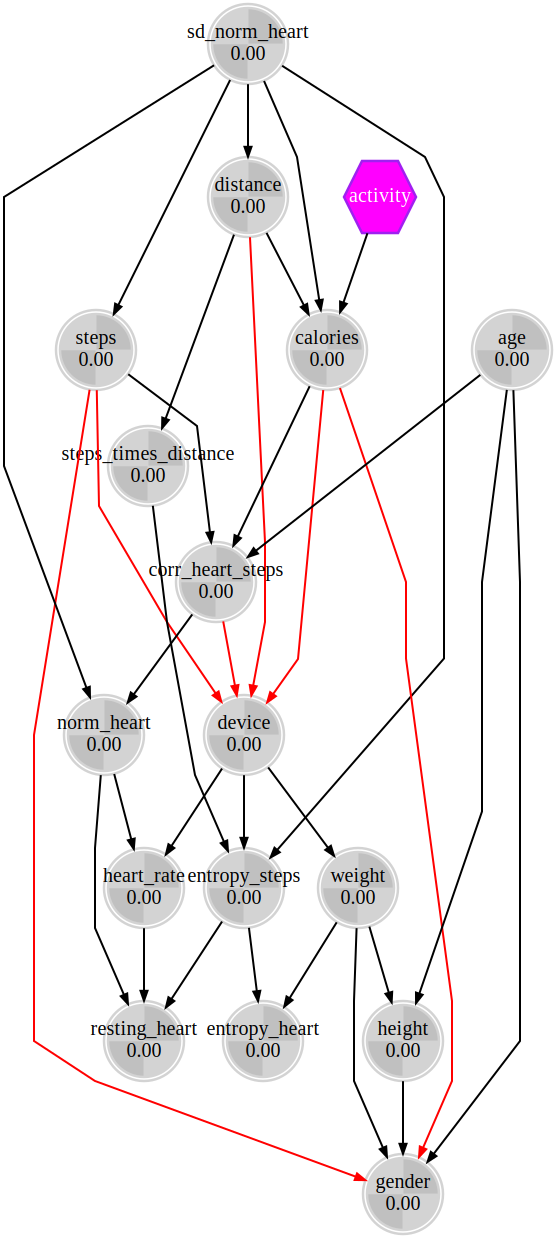

GS
No graph
CCDR


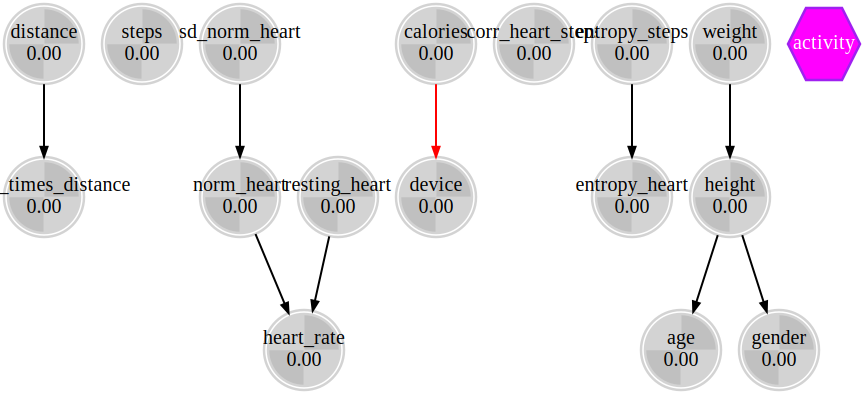

IAMB
No graph
SAM
No graph
BES
No graph
GRASP
No graph
CGNN
No graph


In [15]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))